In [1]:
import numpy as np
import sys
from collections import Counter
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
import math
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import contractions
import re
import spacy
from spacy import displacy
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
import time

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pburn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pburn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
STOP_WORDS = set(stopwords.words('english'))
NER = spacy.load("en_core_web_sm")

In [3]:
# Reading in dataset
yelp_df = pd.read_csv("yelp.csv")
yelp_df = yelp_df[['review_id', 'text', 'stars']]
yelp_df['stars'] = yelp_df['stars'].apply(str)
yelp_df.head()

,review_id,text,stars
0,fWKvX83p0-ka4JS3dc6E5A,My wife took me here on my birthday for breakf...,5
1,IjZ33sJrzXqU-0X6U8NwyA,I have no idea why some people give bad review...,5
2,IESLBzqUCLdSzSqm0eCSxQ,love the gyro plate. Rice is so good and I als...,4
3,G-WvGaISbqqaMHlNnByodA,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5
4,1uJFq2r5QfJG_6ExMRCaGw,General Manager Scott Petello is a good egg!!!...,5


In [4]:
def apply_space_tokenization(text):
    new_text = text.split(' ')
    return new_text

def apply_lowercase(text):
    new_text = text.lower()
    return new_text

In [5]:
yelp_df['text'] = yelp_df['text'].apply(apply_lowercase)
#yelp_df['text'] = yelp_df['text'].apply(apply_space_tokenization)
yelp_df

,review_id,text,stars
0,fWKvX83p0-ka4JS3dc6E5A,my wife took me here on my birthday for breakf...,5
1,IjZ33sJrzXqU-0X6U8NwyA,i have no idea why some people give bad review...,5
2,IESLBzqUCLdSzSqm0eCSxQ,love the gyro plate. rice is so good and i als...,4
3,G-WvGaISbqqaMHlNnByodA,"rosie, dakota, and i love chaparral dog park!!...",5
4,1uJFq2r5QfJG_6ExMRCaGw,general manager scott petello is a good egg!!!...,5
...,...,...,...
9995,Ubyfp2RSDYW0g7Mbr8N3iA,first visit...had lunch here today - used my g...,3
9996,2XyIOQKbVFb6uXQdJ0RzlQ,should be called house of deliciousness!\r\n\r...,4
9997,jyznYkIbpqVmlsZxSDSypA,i recently visited olive and ivy for business ...,4
9998,5UKq9WQE1qQbJ0DJbc-B6Q,my nephew just moved to scottsdale recently so...,2


# Preprocessing Expirements
#### Potentially we do some constants throughout our experiments? I.e Tokenize just by spaces, and lowecase all

### No Pre-Processing

### Lemanization

In [6]:
def apply_lem(text):
    lem = WordNetLemmatizer()
    new_text = []
    for word in text.split(' '):
        new_word = lem.lemmatize(word)
        new_text.append(new_word)
    review = ' '.join(new_text)
    return review

### Stemming

In [7]:
def apply_stemming(text):
    ps = PorterStemmer()
    new_text = []
    for word in text.split(' '):
        new_word = ps.stem(word)
        new_text.append(new_word)
    review = ' '.join(new_text)
    return review

### Contraction expansion

In [8]:
def apply_contraction_expansion(text):
    new_text = []
    for word in text.split(' '):
        new_word = contractions.fix(text)
        new_text.append(new_word)
    review = ' '.join(new_text)
    return review

### Removing Number related text

In [9]:
def apply_number_removal(text):
    review = re.sub(r'[0-9]', '', text)
    return review

### Punctuation Removal

In [10]:
def apply_punctuation_removal(text):
    review = re.sub(r'[.,!?-_;:&#$@%=+]', '', text)
    return review

### Stopword Removal

In [11]:
def apply_stopword_removal(text):
    new_text = []
    for word in text.split(' '):
        if text in STOP_WORDS:
            continue
        else:
            new_text.append(word)
    review = ' '.join(new_text)
    return review

### Spell Check Removal

In [12]:
def apply_spelling_correction(text):
    textBlb = TextBlob(text)
    textCorrected = textBlb.correct() 
    return textCorrected

### NER AND POS TAGGING

In [13]:
def apply_spacy(text):
    applied_text = NER(text)
    return applied_text


def get_pos(spacy_text):
    for word in spacy_text:
        print(word.text, word.pos_)

def get_ner(spacy_text):
    for word in spacy_text:
        print(word.text, word.label_)
        
# to return the labels
# spacy_words = apply_spacy("Mr. Todd Google Astroworld, Gatorade Chicago $5 is very cool")   
# get_pos(spacy_words)

# for word in spacy_words.ents:
#     print(word.text,word.label_)




### Removing Certain P.O.S

### Pre-Processing Combination
#### Perhaps we run experiments with random combinations of all methods and see best performance

# Model Creation & Test Execution

In [14]:
def report_metrics(gold_labels, predicted_labels, name, clf):
    # Reporting metrics & confusion matrix
    acc = round(accuracy_score(gold_labels, predicted_labels), 4)
    err = round(1 - acc, 4)
    pre = round(precision_score(gold_labels, predicted_labels, average='macro'), 4)
    rec = round(recall_score(gold_labels, predicted_labels, average='macro'), 4)
    f1 = round(f1_score(gold_labels, predicted_labels, average='macro'), 4)

    print("Accuracy: ", acc)
    print("Error: ", err)
    print("Precision: ", pre)
    print("Recall: ", rec)
    print("F1-Score: ", f1)

    cf_matrix = confusion_matrix(gold_labels, predicted_labels, labels=clf.classes_)
    rcParams['figure.figsize'] = 16,12
    sns.heatmap(cf_matrix, annot=True, cmap="Greens", xticklabels=clf.classes_, yticklabels=clf.classes_, fmt='g')
    plt.title(name)
    plt.ylabel("True Labels")
    plt.xlabel("Predicted Labels")
    plt.show()
    
    return acc, err, pre, rec, f1

In [15]:
def setup_experiment(data, pre_processing_step):
    
    experiment_df = data
    start_time = time.time()
    experiment_df['text'] = experiment_df['text'].apply(pre_processing_step)
    end_time = time.time()
    
    # Creating a corpus (list of documents)
    corpus = []
    for idx, row in experiment_df.iterrows():
        corpus.append(row['text'])
    
    # Using tf-idf representation as a baseline featutre representation
    vectorizer = CountVectorizer()
    #vectorizer = TfidfVectorizer(max_features=400)
    
    X = vectorizer.fit_transform(corpus).toarray()
    y = experiment_df['stars']
    
    return X, y, start_time - end_time

In [16]:
def run_experiment(X, y, model_name, time):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)
    
    if model_name == 'NB':
        model = MultinomialNB(fit_prior=False)
    elif model_name == 'Deep':
        pass
    else:
        pass
    
    # Running experiment
    model.fit(X_train, y_train)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Calculating metrics
    acc, err, pre, rec, f1 = report_metrics(y_test, predictions, model_name, model)
    
    return acc, err, pre, rec, f1, time

Accuracy:  0.4865
Error:  0.5135
Precision:  0.4584
Recall:  0.3791
F1-Score:  0.3852


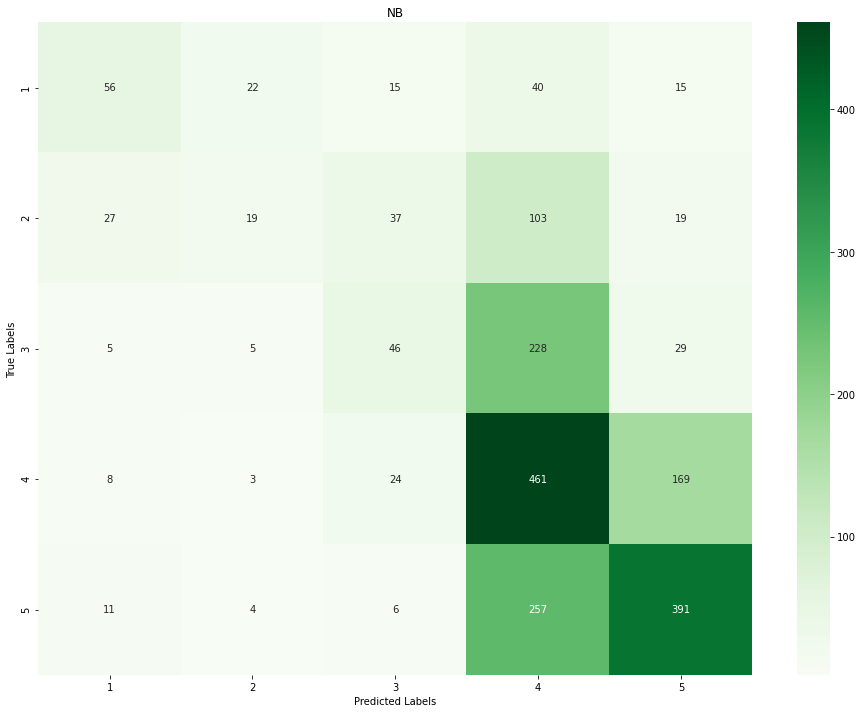

Accuracy:  0.494
Error:  0.506
Precision:  0.4534
Recall:  0.3834
F1-Score:  0.3878


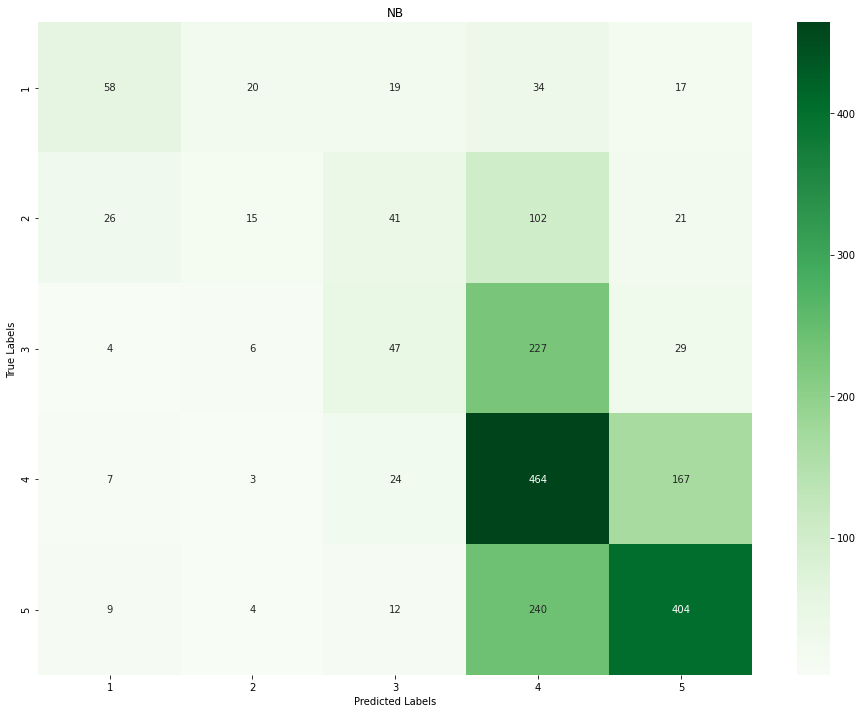

Accuracy:  0.4495
Error:  0.5505
Precision:  0.4132
Recall:  0.3877
F1-Score:  0.3963


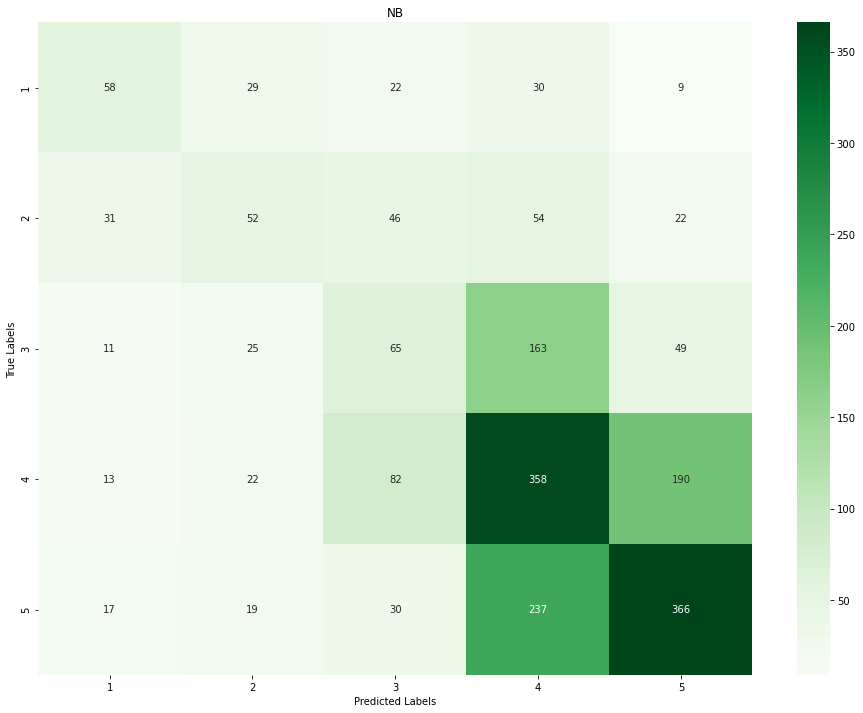

Accuracy:  0.451
Error:  0.549
Precision:  0.4173
Recall:  0.3911
F1-Score:  0.3997


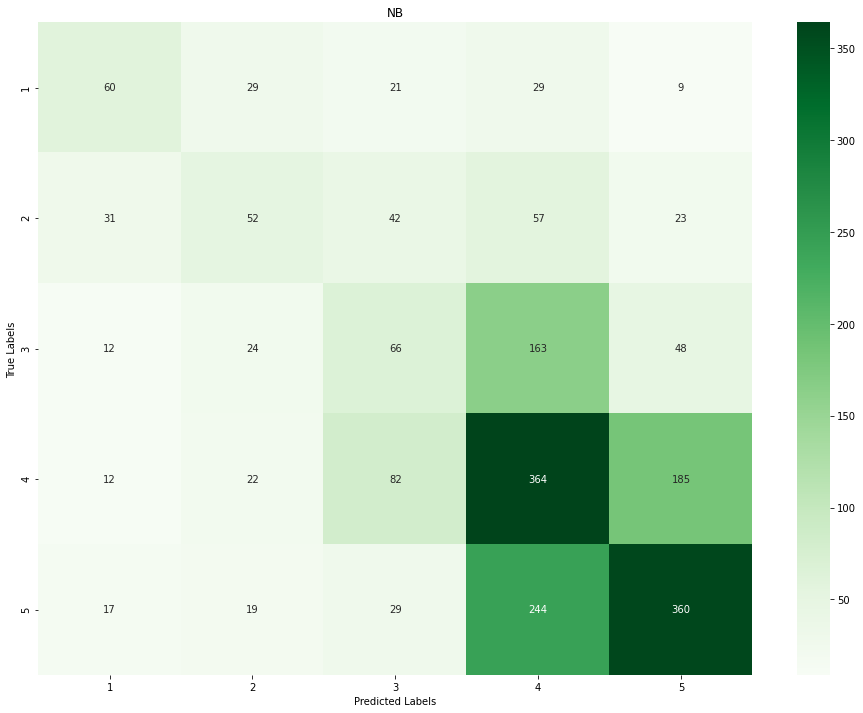

Accuracy:  0.446
Error:  0.554
Precision:  0.4092
Recall:  0.3866
F1-Score:  0.3945


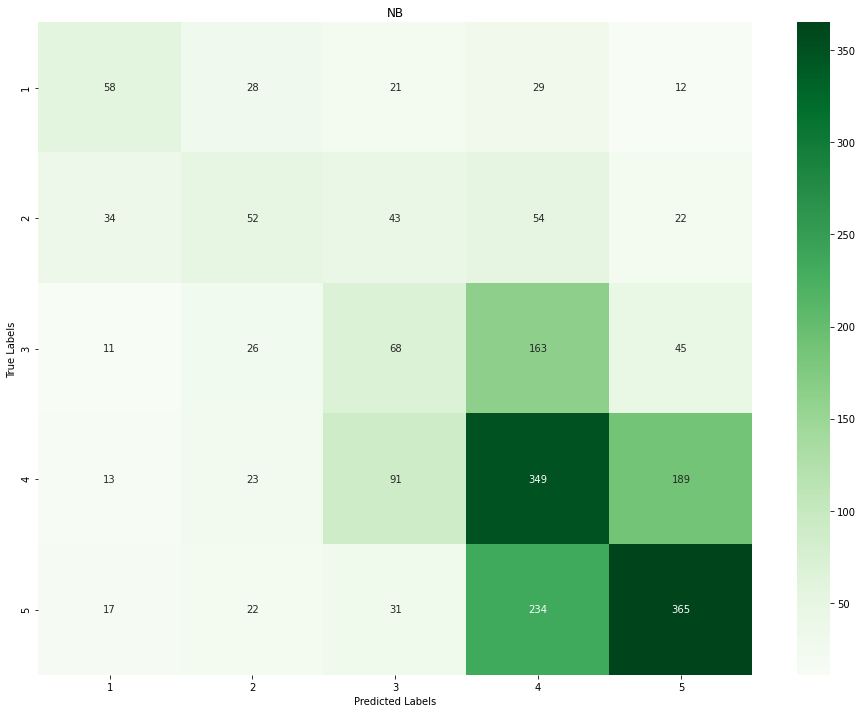

Accuracy:  0.446
Error:  0.554
Precision:  0.4092
Recall:  0.3866
F1-Score:  0.3945


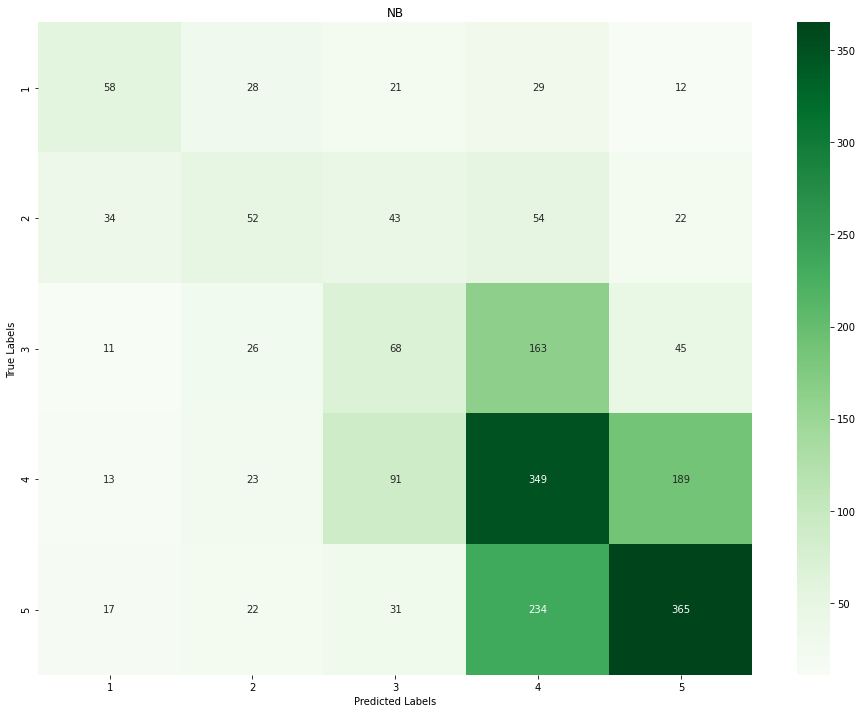

In [17]:
# Pre-processing options
# apply_spelling_correction
options = [apply_lem, apply_stemming, apply_contraction_expansion, apply_number_removal,
          apply_punctuation_removal, apply_stopword_removal]
options_string = ['lem', 'stemming', 'contraction_expansion', 'number_removal',
          'punctuation_removal', 'stopword_removal']

columns = ['Pre-Processing', 'Acuracy', 'Error', 'Precision', 'Recall', 'F1-Score', 'Time']

results_df = pd.DataFrame(columns=columns)

for option, name in zip(options, options_string):
    X, y, t = setup_experiment(yelp_df, option)
    acc, err, pre, rec, f1, t = run_experiment(X, y, "NB", t)
    df_dict = {'Pre-Processing':name, 'Acuracy':acc, 'Error':err, 'Precision':pre, 'Recall':rec, 'F1-Score':f1, 'Time':t}
    results_df = results_df.append(df_dict, ignore_index=True)

In [18]:
results_df

,Pre-Processing,Acuracy,Error,Precision,Recall,F1-Score,Time
0,lem,0.4865,0.5135,0.4584,0.3791,0.3852,-4.729631
1,stemming,0.4940,0.5060,0.4534,0.3834,0.3878,-15.725019
2,contraction_expansion,0.4495,0.5505,0.4132,0.3877,0.3963,-77.730234
3,number_removal,0.4510,0.5490,0.4173,0.3911,0.3997,-9.014992
4,punctuation_removal,0.4460,0.5540,0.4092,0.3866,0.3945,-12.526967
5,stopword_removal,0.4460,0.5540,0.4092,0.3866,0.3945,-42.768528


In [19]:
execute_all = False
if execute_all:
    experiment_df = yelp_df
    experiment_df['text'] = experiment_df['text'].apply(apply_lem)
    print(1)
    experiment_df['text'] = experiment_df['text'].apply(apply_stemming)
    print(2)
    experiment_df['text'] = experiment_df['text'].apply(apply_contraction_expansion)
    print(3)
    experiment_df['text'] = experiment_df['text'].apply(apply_number_removal)
    print(4)
    experiment_df['text'] = experiment_df['text'].apply(apply_punctuation_removal)
    print(5)
    experiment_df['text'] = experiment_df['text'].apply(apply_stopword_removal)
    print(6)

    # Creating a corpus (list of documents)
    corpus = []
    for idx, row in experiment_df.iterrows():
        corpus.append(row['text'])

    # Using tf-idf representation as a baseline featutre representation
    vectorizer = CountVectorizer()
    #vectorizer = TfidfVectorizer(max_features=400)

    X = vectorizer.fit_transform(corpus).toarray()
    y = experiment_df['stars']

    run_experiment(X, y, "NB")

In [20]:
# Two Models

# Logistic Regression


# Deep Learning (idk steal one of the previous ones we made)

# Result Collection & Visualization